# \Sigma_{a2} в зависимости от плотности теплоносителя, температуры теплоносителя, температуры топлива и концентрации борной кислоты

## 1. Загрузка данных

In [1]:
import pandas as pd

Загрузка данных

In [2]:
df = pd.read_excel('Input/Data.xlsx')
df.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),3S_{tr1}(1),3S_{tr2}(2),\Sigma_{a1}(3),\Sigma_{a2}(4),nuS_{f1}(5),nuS_{f2}(6),\Sigma_{f1}(7),\Sigma_{f2}(8),\Sigma_{1->2}(9),k_{inf}(10),\sigma_{a2}^{Xe},\sigma_{a2}^{Sm}
0,0.7235,575.0,1027.0,600.0,0.661853,2.568298,0.009376,0.085584,0.006677,0.133250,0.002620,0.054750,0.017392,1.261041,1072970.0,35421.398
1,0.7750,448.0,1043.0,1500.0,0.679602,2.874687,0.009581,0.098339,0.006723,0.139256,0.002636,0.057218,0.018726,1.174265,1141000.0,36147.801
2,0.9125,370.5,1418.0,750.0,0.727336,3.668742,0.009908,0.102815,0.006844,0.153823,0.002681,0.063203,0.022463,1.249619,1308480.0,39214.000


In [3]:
names = ['\\rho(g/cm^3)',
 'T_c(K)',
 'T_f(K)',
 'c_b(ppm)',
 '\Sigma_{a2}(4)']

In [4]:
train_dataset = df[names].sample(frac=0.8,random_state=0)
test_dataset = df[names].drop(train_dataset.index)

In [5]:
train_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
158,0.798633,405.61719,486.35941,855.46881,0.097073
83,0.701953,561.82812,1664.09400,1195.31200,0.088498
170,1.047852,294.21091,1447.29700,1746.09400,0.123494


In [6]:
test_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
9,0.878125,544.8750,1511.750,562.50,0.091930
21,1.032812,477.0625,1746.125,2343.75,0.117570
25,0.860937,496.4375,339.875,1031.25,0.097283


## 2. Визуализация данных

### 2.1 Корреляционная матрица

<AxesSubplot:>

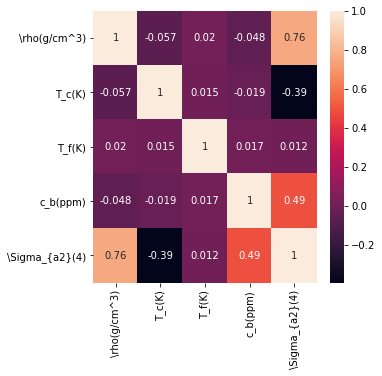

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5)) # Sample figsize in inches
sns.heatmap(train_dataset[names].corr(), annot = True, fmt='.2g')

### 2.2 Диаграммы рассеяния

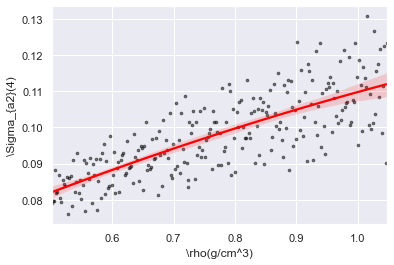

In [8]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['\\rho(g/cm^3)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 2)

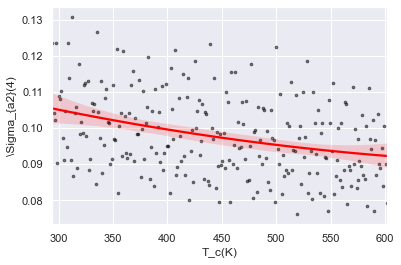

In [9]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['T_c(K)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 2)

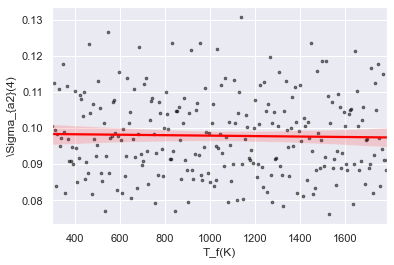

In [10]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['T_f(K)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 1)

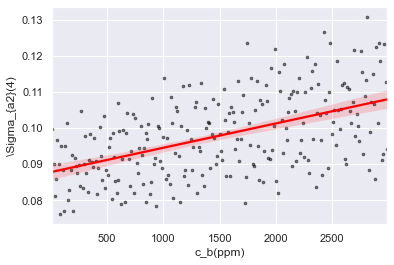

In [11]:
import seaborn as sns
sns.set_theme(color_codes=True)

ax = sns.regplot(x=df['c_b(ppm)'],
                 y="\Sigma_{a2}(4)",
                 data=df,
                 scatter_kws={'s':7, "color": "black", 'alpha':0.5},
                 line_kws={"color": "red"}, order = 1)

## 3. Линейная регрессия

In [12]:
import statsmodels.api as sm
import statsmodels as statsmodels

train_data = train_dataset[names[:-1]]
train_data = sm.add_constant(train_data)

test_data = test_dataset[names[:-1]]
test_data = sm.add_constant(test_data)

display(train_data.head(3))
display(test_data.head(3))

,const,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
158,1.0,0.798633,405.61719,486.35941,855.46881
83,1.0,0.701953,561.82812,1664.09400,1195.31200
170,1.0,1.047852,294.21091,1447.29700,1746.09400


,const,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
9,1.0,0.878125,544.8750,1511.750,562.50
21,1.0,1.032812,477.0625,1746.125,2343.75
25,1.0,0.860937,496.4375,339.875,1031.25


In [13]:
train_labels = train_dataset['\\Sigma_{a2}(4)']
display(train_labels.head(3))

test_labels = test_dataset['\\Sigma_{a2}(4)']
display(test_labels.head(3))

158    0.097073
83     0.088498
170    0.123494
Name: \Sigma_{a2}(4), dtype: float64

9     0.091930
21    0.117570
25    0.097283
Name: \Sigma_{a2}(4), dtype: float64

In [14]:
model = sm.OLS(train_labels, train_data)

fit = model.fit()
g = fit.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         \Sigma_{a2}(4)   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1679.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          3.58e-153
Time:                        23:21:39   Log-Likelihood:                 998.63
No. Observations:                 206   AIC:                            -1987.
Df Residuals:                     201   BIC:                            -1971.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0648      0.001     61.666      0.000       0.063       0.067
\rho(g/cm^3)     0.0540      0.001     63.402      0.000       0.052       0.056
T_c(K)       -4.163e-05   1.48e-06    -28.071      0.000   -4.46e-05   -3.87e-05
T_f(K)       -1.947e-07   3.16e-07     -0.615      0.539   -8.19e-07    4.29e-07
c_b(ppm)      6.735e-06   1.55e-07     43.486      0.000    6.43e-06    7.04e-06
==============================================================================
Omnibus:                       17.557   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.877
Skew:                          -0.577   Prob(JB):                     1.08e-05
Kurtosis:                       4.154   Cond. No.                     1.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
g = fit.pvalues
g

const           1.531535e-132
\rho(g/cm^3)    7.570263e-135
T_c(K)           1.796122e-71
T_f(K)           5.392236e-01
c_b(ppm)        3.352529e-104
dtype: float64

T_f(K) - не значим на 10-ом % урвоне значимости

In [16]:
features = ['\\rho(g/cm^3)', 'T_c(K)', 'c_b(ppm)']

In [17]:
train_data = train_dataset[features]
train_data = sm.add_constant(train_data)

train_data.head(3)

,const,\rho(g/cm^3),T_c(K),c_b(ppm)
158,1.0,0.798633,405.61719,855.46881
83,1.0,0.701953,561.82812,1195.31200
170,1.0,1.047852,294.21091,1746.09400


In [18]:
model = sm.OLS(train_labels, train_data)

fit = model.fit()
g = fit.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         \Sigma_{a2}(4)   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2245.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          8.39e-155
Time:                        23:21:39   Log-Likelihood:                 998.43
No. Observations:                 206   AIC:                            -1989.
Df Residuals:                     202   BIC:                            -1976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0647      0.001     64.310      0.000       0.063       0.067
\rho(g/cm^3)     0.0540      0.001     63.502      0.000       0.052       0.056
T_c(K)       -4.164e-05   1.48e-06    -28.128      0.000   -4.46e-05   -3.87e-05
c_b(ppm)      6.734e-06   1.55e-07     43.549      0.000    6.43e-06    7.04e-06
==============================================================================
Omnibus:                       17.051   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.267
Skew:                          -0.562   Prob(JB):                     1.46e-05
Kurtosis:                       4.154   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
p = fit.pvalues
p

const           1.722241e-136
\rho(g/cm^3)    1.962805e-135
T_c(K)           8.678308e-72
c_b(ppm)        1.251020e-104
dtype: float64

Все регрессоры значимы на 1-ом уровне значимости %.

In [20]:
ypred = fit.predict(train_data)
ypred

158    0.096658
83     0.087220
170    0.120754
101    0.116554
150    0.120150
         ...   
151    0.088743
202    0.122456
31     0.077949
209    0.104405
127    0.078853
Length: 206, dtype: float64

In [21]:
train_labels

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
         ...   
151    0.088855
202    0.126619
31     0.079524
209    0.105022
127    0.079581
Name: \Sigma_{a2}(4), Length: 206, dtype: float64

Mean squared error

\begin{align*}
\text{MSE} = \frac{1}{N} \text{RSS} = \frac{1}{N} \sum (f_i -y_i)^2
\end{align*}

In [22]:
MSE = statsmodels.tools.eval_measures.mse(train_labels, ypred)
MSE

3.611481567630849e-06

Root mean squared error

\begin{align*}
\sigma = \sqrt{MSE}
\end{align*}

In [23]:
RMSE = statsmodels.tools.eval_measures.rmse(train_labels, ypred)
RMSE

0.0019003898462238871

Root Mean Squared Percentage Error

In [24]:
RMSPE = statsmodels.tools.eval_measures.rmspe(train_labels, ypred)
RMSPE

0.2019302004214711

In [25]:
train_labels

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
         ...   
151    0.088855
202    0.126619
31     0.079524
209    0.105022
127    0.079581
Name: \Sigma_{a2}(4), Length: 206, dtype: float64

In [26]:
ypred

158    0.096658
83     0.087220
170    0.120754
101    0.116554
150    0.120150
         ...   
151    0.088743
202    0.122456
31     0.077949
209    0.104405
127    0.078853
Length: 206, dtype: float64

Root Mean Squared Percentage Error for test data

In [27]:
test_data = test_dataset[features]
test_data = sm.add_constant(test_data)
ypred = fit.predict(test_data)

RMSPE = statsmodels.tools.eval_measures.rmspe(test_labels, ypred)
RMSPE

0.178229042661628

## 4. Deep learning

### 4.1 Нормализация признаков

In [28]:
features = ['\\rho(g/cm^3)',
 'T_c(K)',
 'T_f(K)',
 'c_b(ppm)']

In [29]:
df[features].describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
count,257.000000,257.000000,257.000000,257.000000
mean,0.773742,448.491808,1043.838306,1493.967349
std,0.158780,89.316810,430.718000,863.720860
min,0.502148,294.210910,298.859410,11.718750
25%,0.637500,371.710910,673.859380,750.000000
50%,0.772852,448.000000,1043.000000,1488.281000
75%,0.910352,525.500000,1412.141000,2238.281000
max,1.047852,601.789120,1787.141000,2988.281000


In [30]:
df_features_norm = df.copy()

for i in range(len(features)):
    df_features_norm[features[i]] = (df[features[i]]-df[features[i]].mean())/df[features[i]].std()

In [31]:
df_features_norm[features].describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
count,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02
mean,-3.697863e-16,6.013348e-16,7.257489e-17,-3.512106e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.710507e+00,-1.727344e+00,-1.729621e+00,-1.716120e+00
25%,-8.580575e-01,-8.596467e-01,-8.589818e-01,-8.613516e-01
50%,-5.608782e-03,-5.506328e-03,-1.946298e-03,-6.583549e-03
75%,8.603710e-01,8.621915e-01,8.550901e-01,8.617525e-01
max,1.726354e+00,1.716332e+00,1.725729e+00,1.730089e+00


### 4.2 Нейросетевые модели

### 4.2.1 Подготовка к моделированию

In [32]:
names

['\\rho(g/cm^3)', 'T_c(K)', 'T_f(K)', 'c_b(ppm)', '\\Sigma_{a2}(4)']

In [33]:
df_features_norm = df_features_norm[names]
df_features_norm.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
0,-0.316426,1.416398,-0.039094,-1.035019,0.085584
1,0.007922,-0.005506,-0.001946,0.006984,0.098339
2,0.873902,-0.873204,0.868693,-0.861352,0.102815


In [34]:
df_features_norm.describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
count,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,257.000000
mean,-3.697863e-16,6.013348e-16,7.257489e-17,-3.512106e-16,0.097856
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.011233
min,-1.710507e+00,-1.727344e+00,-1.729621e+00,-1.716120e+00,0.076091
25%,-8.580575e-01,-8.596467e-01,-8.589818e-01,-8.613516e-01,0.089572
50%,-5.608782e-03,-5.506328e-03,-1.946298e-03,-6.583549e-03,0.097073
75%,8.603710e-01,8.621915e-01,8.550901e-01,8.617525e-01,0.105296
max,1.726354e+00,1.716332e+00,1.725729e+00,1.730089e+00,0.130769


In [35]:
features

['\\rho(g/cm^3)', 'T_c(K)', 'T_f(K)', 'c_b(ppm)']

In [36]:
df_features_norm[features].head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
0,-0.316426,1.416398,-0.039094,-1.035019
1,0.007922,-0.005506,-0.001946,0.006984
2,0.873902,-0.873204,0.868693,-0.861352


Разделим данные на обучающую и тестовую выборки

In [37]:
train_dataset = df_features_norm.sample(frac=0.8,random_state=0)
test_dataset = df_features_norm.drop(train_dataset.index)

In [38]:
train_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
158,0.156763,-0.480029,-1.294301,-0.739242,0.097073
83,-0.452130,1.268925,1.440051,-0.345778,0.088498
170,1.726354,-1.727344,0.936712,0.291908,0.123494


In [39]:
test_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a2}(4)
9,0.657407,1.079116,1.086353,-1.078436,0.091930
21,1.631631,0.319880,1.630502,0.983863,0.117570
25,0.549160,0.536805,-1.634395,-0.535726,0.097283


Отделим признаки от меток

In [40]:
train_labels = train_dataset.pop('\Sigma_{a2}(4)')
test_labels = test_dataset.pop('\Sigma_{a2}(4)')

In [41]:
train_dataset.head(2)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
158,0.156763,-0.480029,-1.294301,-0.739242
83,-0.452130,1.268925,1.440051,-0.345778


In [42]:
train_labels.head(2)

158    0.097073
83     0.088498
Name: \Sigma_{a2}(4), dtype: float64

Модель

In [43]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def build_model(learning_rate, rho, activation):
    model = keras.Sequential([
        layers.Dense(4, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(2, activation=activation),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = learning_rate, rho = rho)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [44]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

In [45]:
learning_rate = 0.001
rho = 0.99
activation = 'tanh'
model = build_model(learning_rate, rho, activation)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [46]:
normed_train_data = train_dataset

In [47]:
normed_train_data.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
158,0.156763,-0.480029,-1.294301,-0.739242
83,-0.452130,1.268925,1.440051,-0.345778
170,1.726354,-1.727344,0.936712,0.291908


In [48]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.5439329 ],
       [ 0.58422184],
       [ 1.3466398 ],
       [ 0.33631587],
       [-0.12609017],
       [ 1.3256698 ],
       [-0.282296  ],
       [ 1.484937  ],
       [ 0.34475487],
       [-1.4803574 ]], dtype=float32)

Обучение модели

In [49]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

Визуализируем процесс обучения модели используя статистику содержащуюся в объекте history

In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.003173,0.044318,0.003173,0.003326,0.047081,0.003326,95
96,0.003105,0.043712,0.003105,0.003262,0.046515,0.003262,96
97,0.003028,0.043278,0.003028,0.003186,0.045917,0.003186,97
98,0.002976,0.042813,0.002976,0.003191,0.045794,0.003191,98
99,0.002968,0.042478,0.002968,0.003056,0.044900,0.003056,99


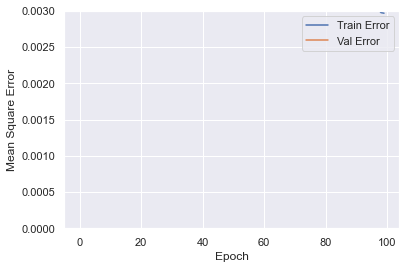

In [51]:
def plot_history(history, ymax):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'],
             hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'],
             hist['val_mse'],
             label = 'Val Error')
    plt.ylim([0,ymax])
    plt.legend()
    plt.show()

plot_history(history, 0.003)

In [52]:
train_labels.head(10)

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
200    0.090989
118    0.099974
236    0.091473
63     0.081892
135    0.077149
Name: \Sigma_{a2}(4), dtype: float64

In [53]:
model.predict(normed_train_data)[0:10]

array([[0.12396696],
       [0.08028042],
       [0.08896825],
       [0.15670437],
       [0.06747562],
       [0.16977525],
       [0.08480844],
       [0.0504564 ],
       [0.12382734],
       [0.08033644]], dtype=float32)

### 4.2.2 Модель 1

In [54]:
# построение модели

learning_rate = 0.001
rho = 0.9
activation = 'tanh'
model = build_model(learning_rate, rho, activation)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Обучение модели

EPOCHS = 300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [56]:
# История обучения

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
295,0.000017,0.002754,0.000017,0.000014,0.002681,0.000014,295
296,0.000006,0.001904,0.000006,0.000011,0.002518,0.000011,296
297,0.000010,0.002561,0.000010,0.000039,0.005170,0.000039,297
298,0.000022,0.003289,0.000022,0.000009,0.002312,0.000009,298
299,0.000004,0.001605,0.000004,0.000012,0.002907,0.000012,299


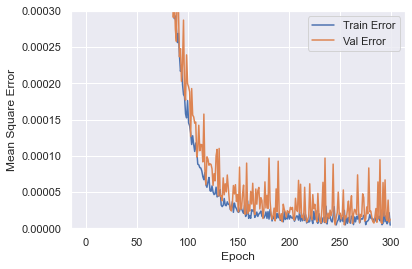

In [57]:
# Отображение процесса обучения

plot_history(history, 0.0003)

In [58]:
# Тренировочные данные

train_labels.head(10)

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
200    0.090989
118    0.099974
236    0.091473
63     0.081892
135    0.077149
Name: \Sigma_{a2}(4), dtype: float64

In [59]:
# Предсказанные данные

model.predict(normed_train_data)[0:10]

array([[0.09417678],
       [0.09181713],
       [0.12331807],
       [0.11860157],
       [0.12265438],
       [0.09617434],
       [0.10025285],
       [0.09237865],
       [0.08623238],
       [0.07838306]], dtype=float32)

### 4.2.3 Модель 2

In [60]:
def build_model_1_layer(learning_rate, rho, activation):
    model = keras.Sequential([
        layers.Dense(4, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = learning_rate, rho = rho)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [61]:
learning_rate = 0.0002
rho = 0.95
activation = 'tanh'
model = build_model_1_layer(learning_rate, rho, activation)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Обучение модели

EPOCHS = 1200

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [63]:
# История обучения

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1195,0.000014,0.002886,0.000014,0.000016,0.002637,0.000016,1195
1196,0.000013,0.002665,0.000013,0.000016,0.002802,0.000016,1196
1197,0.000013,0.002668,0.000013,0.000018,0.002929,0.000018,1197
1198,0.000014,0.002874,0.000014,0.000018,0.002839,0.000018,1198
1199,0.000013,0.002733,0.000013,0.000019,0.003111,0.000019,1199


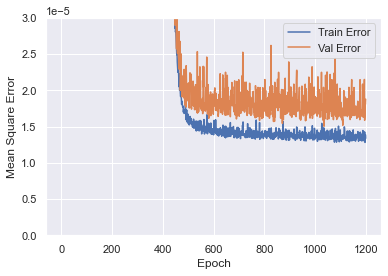

In [64]:
# Отображение процесса обучения

plot_history(history, 0.00003)

In [65]:
# Тренировочные данные

train_labels.head(10)

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
200    0.090989
118    0.099974
236    0.091473
63     0.081892
135    0.077149
Name: \Sigma_{a2}(4), dtype: float64

In [66]:
# Предсказанные данные

model.predict(normed_train_data)[0:10]

array([[0.09610785],
       [0.08385845],
       [0.11560649],
       [0.11112881],
       [0.1171229 ],
       [0.09176464],
       [0.09949834],
       [0.08817894],
       [0.09000183],
       [0.0844223 ]], dtype=float32)

### 4.2.4 Модель 3

In [67]:
def build_model_0_layer(learning_rate, rho, activation):
    model = keras.Sequential([
        layers.Dense(1, activation=activation, input_shape=[len(train_dataset.keys())])
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = learning_rate, rho = rho)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [68]:
learning_rate = 0.0002
rho = 0.95
activation = 'tanh'
model = build_model_0_layer(learning_rate, rho, activation)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Обучение модели

EPOCHS = 1200

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [70]:
# История обучения

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1190,0.000004,0.001481,0.000004,0.000004,0.001367,0.000004,1190
1191,0.000004,0.001506,0.000004,0.000003,0.001338,0.000003,1191
1192,0.000004,0.001517,0.000004,0.000004,0.001424,0.000004,1192
1193,0.000004,0.001486,0.000004,0.000004,0.001435,0.000004,1193
1194,0.000004,0.001495,0.000004,0.000004,0.001406,0.000004,1194
1195,0.000004,0.001536,0.000004,0.000004,0.001425,0.000004,1195
1196,0.000004,0.001485,0.000004,0.000004,0.001574,0.000004,1196
1197,0.000004,0.001630,0.000004,0.000003,0.001387,0.000003,1197
1198,0.000004,0.001492,0.000004,0.000004,0.001466,0.000004,1198
1199,0.000004,0.001493,0.000004,0.000004,0.001421,0.000004,1199


In [71]:
# Тренировочные данные

train_labels.head(10)

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
200    0.090989
118    0.099974
236    0.091473
63     0.081892
135    0.077149
Name: \Sigma_{a2}(4), dtype: float64

In [72]:
# Предсказанные данные

model.predict(normed_train_data)[0:10]

array([[0.09669279],
       [0.08663753],
       [0.12031846],
       [0.11677878],
       [0.12031513],
       [0.09114286],
       [0.10039569],
       [0.08991548],
       [0.08260716],
       [0.07236146]], dtype=float32)

### 4.2.5 Модель 4

In [73]:
normed_train_data

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
158,0.156763,-0.480029,-1.294301,-0.739242
83,-0.452130,1.268925,1.440051,-0.345778
170,1.726354,-1.727344,0.936712,0.291908
101,1.442199,0.889307,1.059145,1.662251
150,0.806247,-1.564651,-0.206002,1.648683
...,...,...,...,...
151,-0.925712,0.170745,1.535275,-0.087989
202,1.591040,-1.266380,-1.158264,1.078837
31,-1.615790,0.102956,-0.328436,-0.969894
209,0.400320,1.011327,1.344824,1.187379


In [74]:
normed_train_data = normed_train_data.drop(['T_f(K)'], axis=1)
normed_train_data

,\rho(g/cm^3),T_c(K),c_b(ppm)
158,0.156763,-0.480029,-0.739242
83,-0.452130,1.268925,-0.345778
170,1.726354,-1.727344,0.291908
101,1.442199,0.889307,1.662251
150,0.806247,-1.564651,1.648683
...,...,...,...
151,-0.925712,0.170745,-0.087989
202,1.591040,-1.266380,1.078837
31,-1.615790,0.102956,-0.969894
209,0.400320,1.011327,1.187379


In [75]:
def build_model_0_layer(learning_rate, rho, activation):
    model = keras.Sequential([
        layers.Dense(1, activation=activation, input_shape=[len(normed_train_data.keys())])
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = learning_rate, rho = rho)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [76]:
learning_rate = 0.0002
rho = 0.9999
activation = 'tanh'
model = build_model_0_layer(learning_rate, rho, activation)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Обучение модели

EPOCHS = 1200

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [78]:
# История обучения

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1190,0.000004,0.001446,0.000004,0.000004,0.001338,0.000004,1190
1191,0.000004,0.001442,0.000004,0.000004,0.001339,0.000004,1191
1192,0.000004,0.001449,0.000004,0.000004,0.001336,0.000004,1192
1193,0.000004,0.001445,0.000004,0.000004,0.001337,0.000004,1193
1194,0.000004,0.001446,0.000004,0.000004,0.001338,0.000004,1194
1195,0.000004,0.001449,0.000004,0.000004,0.001340,0.000004,1195
1196,0.000004,0.001450,0.000004,0.000004,0.001340,0.000004,1196
1197,0.000004,0.001453,0.000004,0.000004,0.001346,0.000004,1197
1198,0.000004,0.001461,0.000004,0.000004,0.001343,0.000004,1198
1199,0.000004,0.001454,0.000004,0.000004,0.001346,0.000004,1199


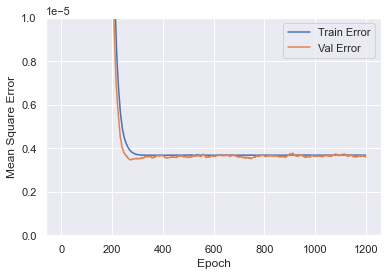

In [79]:
# Отображение процесса обучения

plot_history(history, 0.00001)

In [80]:
# Тренировочные данные

train_labels.head(10)

158    0.097073
83     0.088498
170    0.123494
101    0.118627
150    0.123561
200    0.090989
118    0.099974
236    0.091473
63     0.081892
135    0.077149
Name: \Sigma_{a2}(4), dtype: float64

In [81]:
# Предсказанные данные

model.predict(normed_train_data)[0:10]

array([[0.09664799],
       [0.08722921],
       [0.12061753],
       [0.11645753],
       [0.12018514],
       [0.0920635 ],
       [0.10035715],
       [0.09091918],
       [0.08340174],
       [0.07248101]], dtype=float32)